In [62]:
#librerías necesarias
import pandas as pd 
import matplotlib.pyplot as plt
import pylab as pl
import seaborn as sns
import numpy as np
#Permite visualizar matplotlib en notebook
% matplotlib inline

#Lee desde cssv precios históricos de cripto
df = pd.read_csv('/Users/rulloal/CoinMarketCap-Historical-Prices/HistoricalCoinData.csv')

#Filtros de limpieza y formateo de registros
df['Close**'] = pd.to_numeric(df['Close**'], errors='coerce')
df['Market Cap'] = pd.to_numeric(df['Market Cap'].str.replace(',',''), errors='coerce')
df['Date'] = pd.to_datetime(df['Date'].str.replace('No data was found for the selected time period.',''), errors='coerce')
df1 = df.set_index(['Date']).sort_values(by=['Date'])

In [63]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 80427 entries, 2013-04-28 to 2019-06-04
Data columns (total 7 columns):
Coin          80427 non-null object
Open*         80427 non-null float64
High          80427 non-null float64
Low           80427 non-null float64
Close**       80427 non-null float64
Volume        80427 non-null object
Market Cap    77634 non-null float64
dtypes: float64(5), object(2)
memory usage: 4.9+ MB


In [75]:
#Filtro por fecha
filtro = df1.index > '2018-01-01'
df2 = df1[np.logical_and.reduce([filtro])]
df2.head()

,Coin,Open*,High,Low,Close**,Volume,Market Cap
Date,,,,,,,
2018-01-02,qtum,61.190000,62.460000,59.750000,60.720000,"597,468,032",4.479559e+09
2018-01-02,zencash,56.060000,56.390000,47.460000,52.120000,"6,967,560",1.518682e+08
2018-01-02,loopring,0.457477,0.519139,0.426574,0.487843,"10,427,400",1.396064e+08
2018-01-02,steem,3.980000,7.140000,3.970000,6.690000,"118,530,000",1.651692e+09
2018-01-02,bitcoin-cash,2434.500000,2867.140000,2434.500000,2711.000000,"1,831,229,952",4.578981e+10


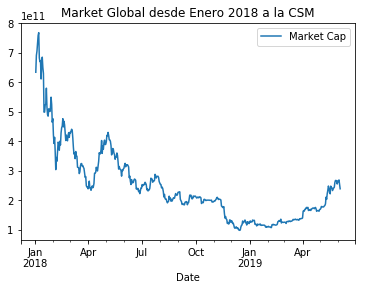

In [78]:
#Grafica MC for fecha
df2.groupby(['Date']).sum().plot(y='Market Cap', title='Market Global desde Enero 2018 a la CSM')

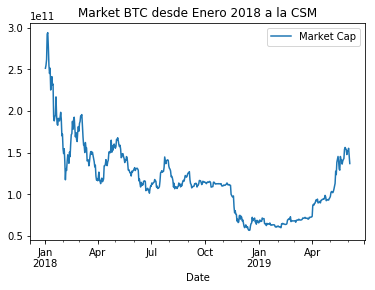

In [80]:
#Filtra por BTC y Grafica MC for fecha
df_btc = df2[df2['Coin'] == 'bitcoin']

df_btc.groupby(['Date']).sum().plot(y='Market Cap', title='Market BTC desde Enero 2018 a la CSM')

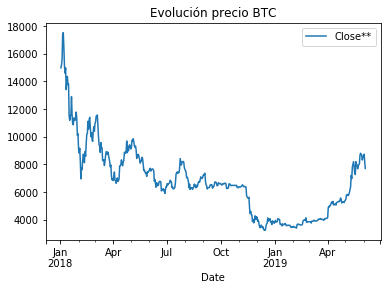

In [81]:
df_btc = df2[df2['Coin'] == 'bitcoin']
df_btc.groupby(['Date']).sum().plot(y='Close**', title = 'Evolución precio BTC')

In [82]:
#Genera variación entre precio de apertura y precio de cierre
df_btc['Variación'] = (df_btc['Close**'] / df_btc['Open*'])
df_btc.head()

C:\Users\rulloal\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Coin,Open*,High,Low,Close**,Volume,Market Cap,Variación
Date,,,,,,,,
2018-01-02,bitcoin,13625.0,15444.6,13163.6,14982.1,"16,846,600,192",2.513779e+11,1.099604
2018-01-03,bitcoin,14978.2,15572.8,14844.5,15201.0,"16,871,900,160",2.550806e+11,1.014875
2018-01-04,bitcoin,15270.7,15739.7,14522.2,15599.2,"21,783,199,744",2.617953e+11,1.021512
2018-01-05,bitcoin,15477.2,17705.2,15202.8,17429.5,"23,840,899,072",2.925441e+11,1.126140
2018-01-06,bitcoin,17462.1,17712.4,16764.6,17527.0,"18,314,600,448",2.942174e+11,1.003717


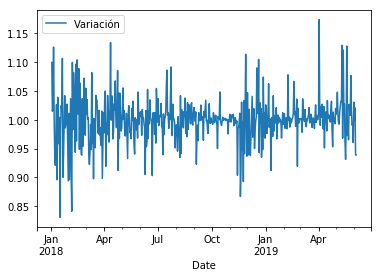

In [83]:
df_btc.groupby(['Date']).sum().plot(y='Variación')


In [84]:
Inversión_inicial = 1000

df_btc['Inversión_inicial'] = Inversión_inicial * df_btc['Variación'] - 1000
df_btc['Profit_ac'] = df_btc['Inversión_inicial'].cumsum()
df_btc['Resultado'] = df_btc['Profit_ac'] + Inversión_inicial
df_btc.head()

C:\Users\rulloal\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\rulloal\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\rulloal\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set o

,Coin,Open*,High,Low,Close**,Volume,Market Cap,Variación,Inversión_inicial,Profit_ac,Resultado
Date,,,,,,,,,,,
2018-01-02,bitcoin,13625.0,15444.6,13163.6,14982.1,"16,846,600,192",2.513779e+11,1.099604,99.603670,99.603670,1099.603670
2018-01-03,bitcoin,14978.2,15572.8,14844.5,15201.0,"16,871,900,160",2.550806e+11,1.014875,14.874952,114.478621,1114.478621
2018-01-04,bitcoin,15270.7,15739.7,14522.2,15599.2,"21,783,199,744",2.617953e+11,1.021512,21.511784,135.990405,1135.990405
2018-01-05,bitcoin,15477.2,17705.2,15202.8,17429.5,"23,840,899,072",2.925441e+11,1.126140,126.140387,262.130792,1262.130792
2018-01-06,bitcoin,17462.1,17712.4,16764.6,17527.0,"18,314,600,448",2.942174e+11,1.003717,3.716621,265.847413,1265.847413


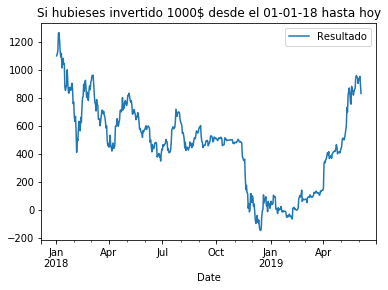

In [89]:
df_btc.groupby(['Date']).sum().plot(y='Resultado', title='Si hubieses invertido 1000$ desde el 01-01-18 hasta hoy')

C:\Users\rulloal\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


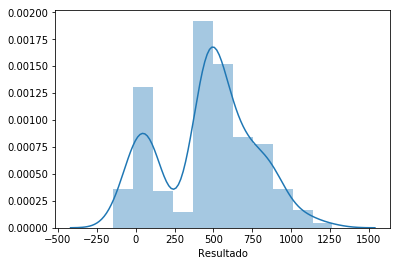

In [105]:

sns.distplot(df_btc['Resultado'])